In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("data/weather-mod.csv")

In [3]:
data.index = data.date
data = data.drop(['date'], axis=1)

In [4]:
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir', 'rain', 'thunderstorm', 'fog',
       'snow', 'max_tempc', 'min_tempc', 'mean_tempc'],
      dtype='object')

In [5]:
data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,cloud_cover,events,wind_dir,rain,thunderstorm,fog,snow,max_tempc,min_tempc,mean_tempc
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,0,NaN,138,False,False,False,False,13.333333,-4.444444,4.444444
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,1,Rain,163,True,False,False,False,19.444444,-1.111111,9.444444
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,6,Rain,190,True,False,False,False,21.666667,11.666667,16.666667
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,0,NaN,242,False,False,False,False,24.444444,10.000000,17.222222
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,0,NaN,202,False,False,False,False,26.666667,6.666667,16.666667


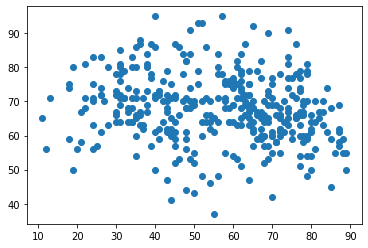

In [9]:
plt.plot('mean_temp', 'mean_humidity', data=data, linestyle='none', marker='o')
plt.show()

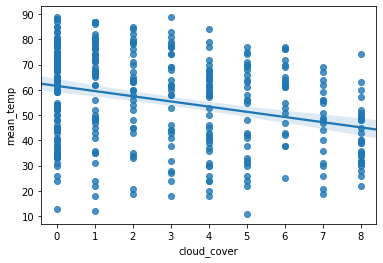

In [10]:
sb.regplot(x=data['cloud_cover'], y=data['mean_temp'])

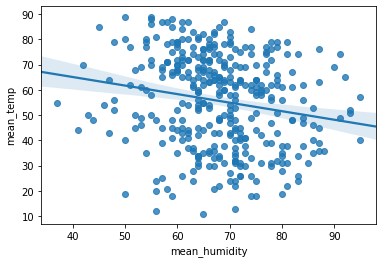

In [11]:
sb.regplot(x=data['mean_humidity'], y=data['mean_temp'])

In [12]:
sub_data = data[['mean_temp', 'mean_dew', 'mean_humidity', 'min_humidity', 
       'mean_pressure', 'mean_visibility', 'mean_wind', 'precipitation',
       'cloud_cover']]
sub_data.head()

,mean_temp,mean_dew,mean_humidity,min_humidity,mean_pressure,mean_visibility,mean_wind,precipitation,cloud_cover
date,,,,,,,,,
2012-03-10,40,20,50,26,30.45,10,6,0.00,0
2012-03-11,49,31,53,28,30.27,10,7,T,1
2012-03-12,62,55,76,61,29.99,10,14,0.03,6
2012-03-13,63,53,66,38,30.06,10,5,0.00,0
2012-03-14,62,52,68,42,30.10,10,6,0.00,0


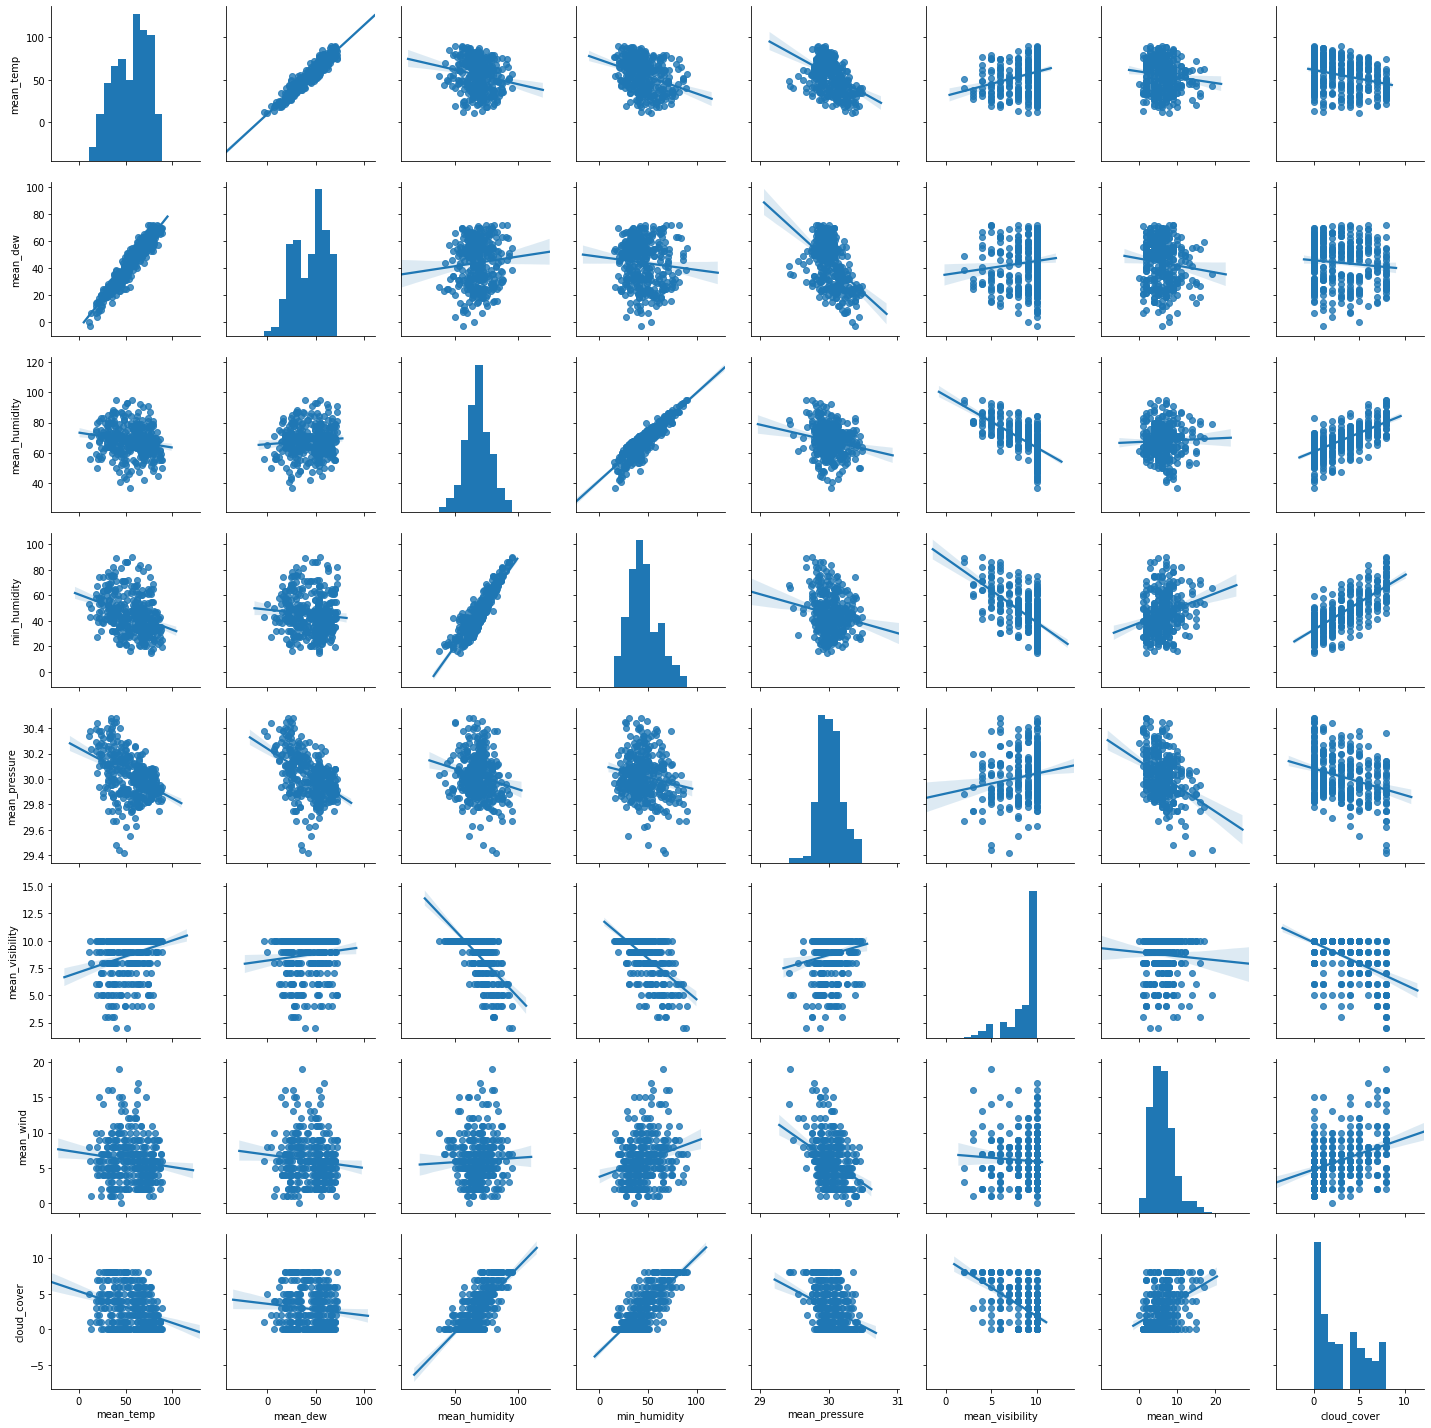

In [10]:
sb.pairplot(sub_data, kind="reg")
plt.show()

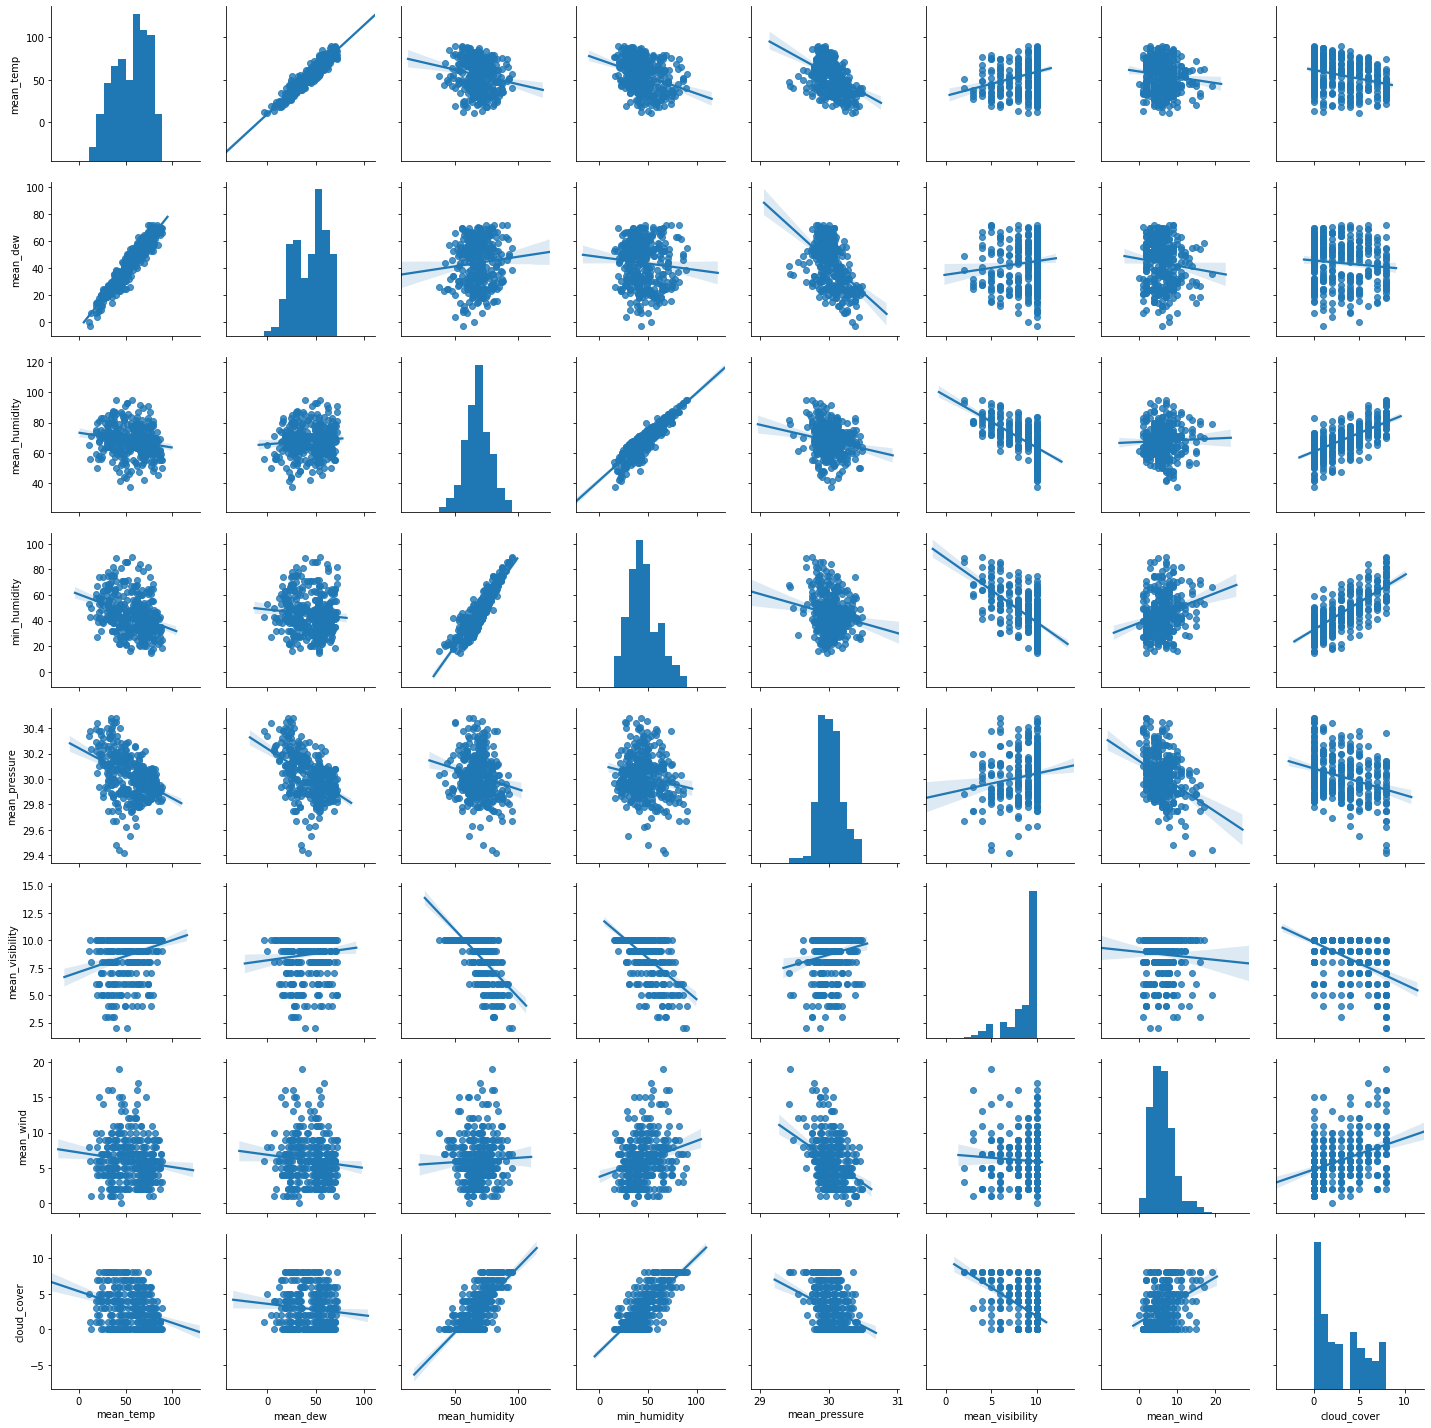

In [11]:
sb.pairplot(sub_data, kind="reg")
plt.show()

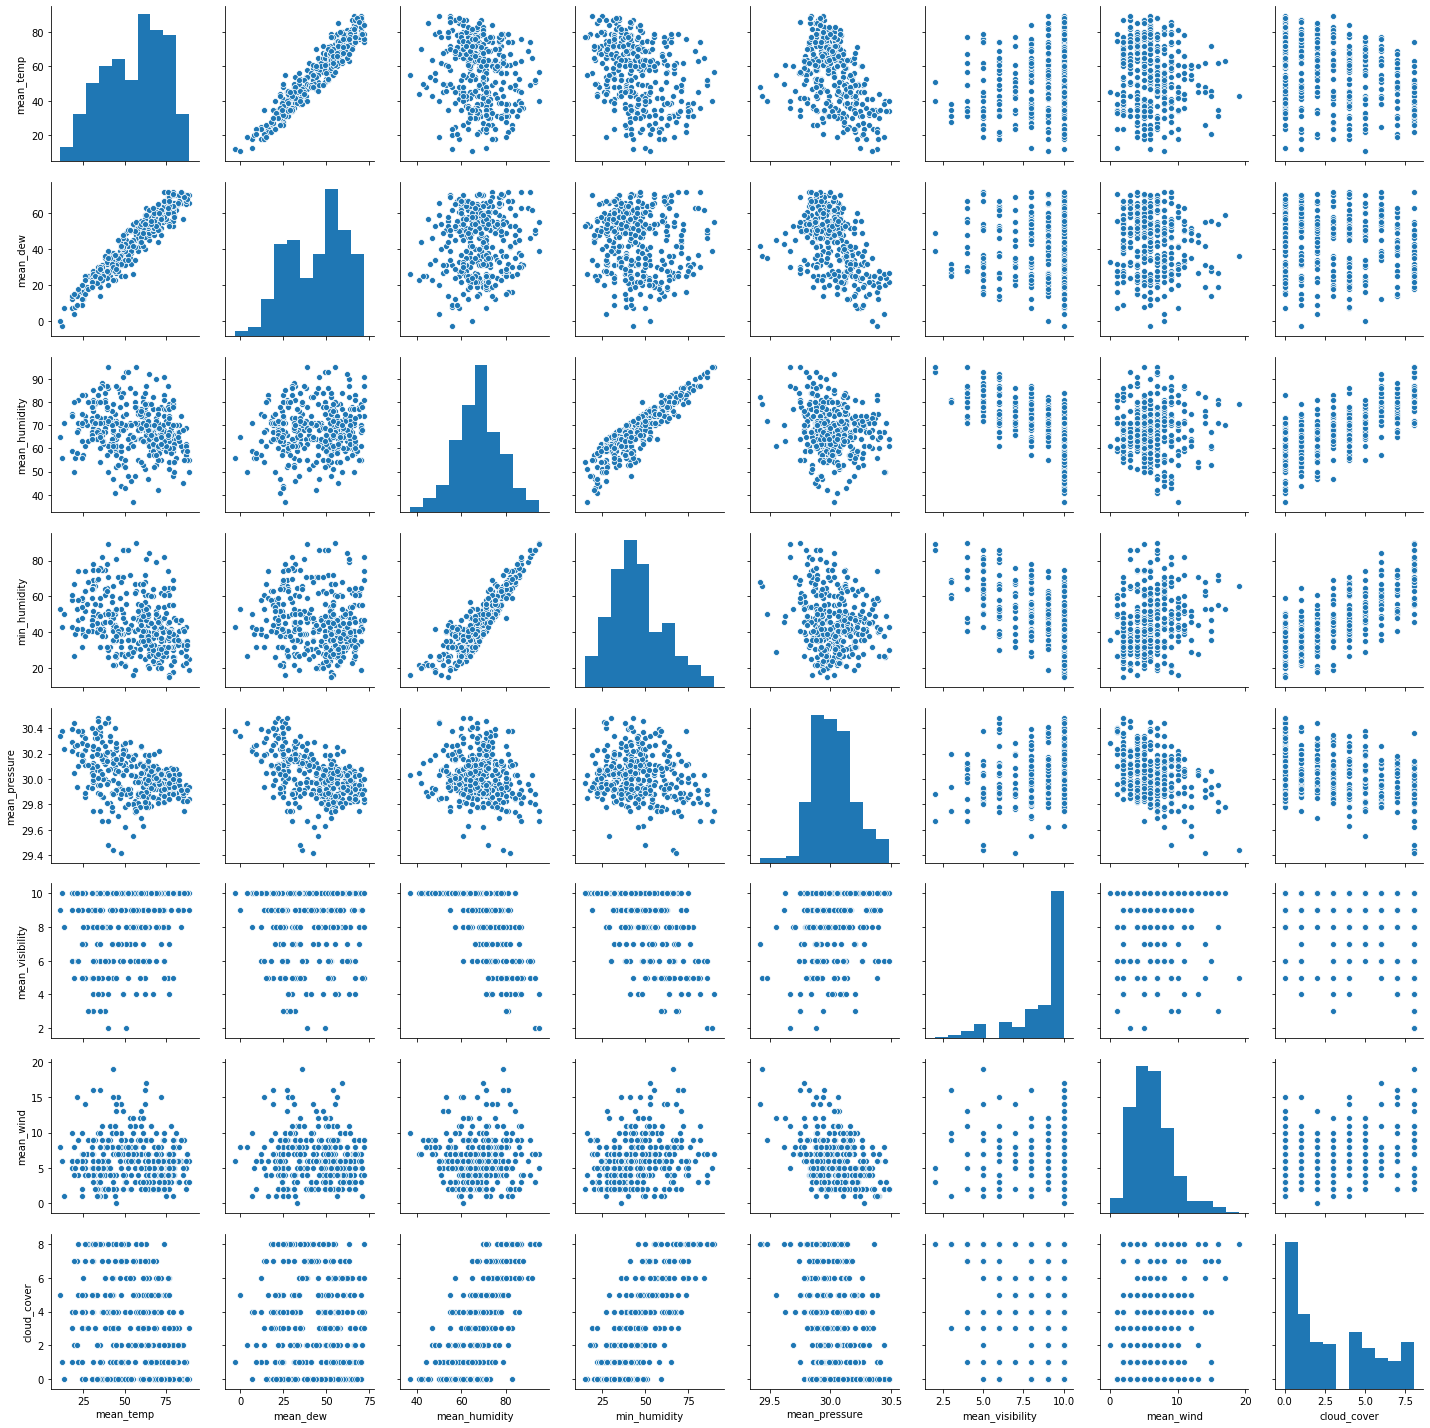

In [12]:
sb.pairplot(sub_data, kind="scatter")
plt.show()

In [14]:
def read_gapminder_data(filename, colname):
    data = pd.read_csv("data/gapminder/{}".format(filename), header=None)
    data.columns = ['country', colname]
    data.index = data.country
    data = data.drop(['country'], axis=1)
    return data

In [15]:
employment = read_gapminder_data("employment.csv", "employment")
life_exp = read_gapminder_data("life_expectancy.csv", "life_exp")
gdp = read_gapminder_data("gdp_per_capita.csv", "gdp")

In [16]:
frames = [employment, life_exp, gdp]
gm_data = pd.concat(frames, axis=1)

In [17]:
gm_data.head()

,employment,life_exp,gdp
country,,,
Albania,51.400002,74.7,1681.613910
Algeria,50.500000,75.0,2155.485231
Angola,75.699997,57.6,562.987685
Argentina,58.400002,75.4,9388.688523
Armenia,40.099998,72.3,1424.190562


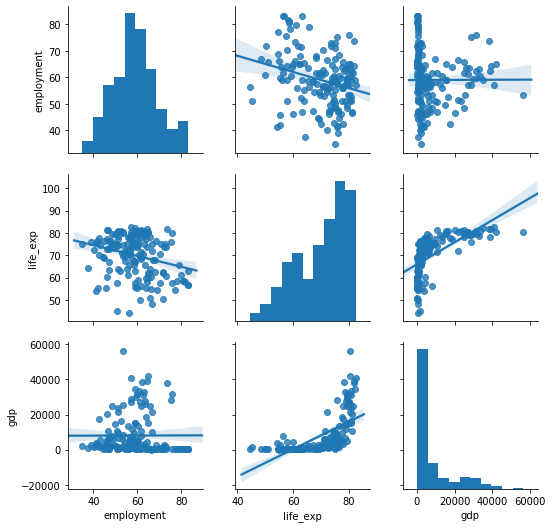

In [18]:
sb.pairplot(gm_data, kind="reg")
plt.show()

In [19]:
gm_subset = gm_data.sample(n=50)
x = gm_subset.index
y = gm_subset.life_exp
z = gm_subset.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

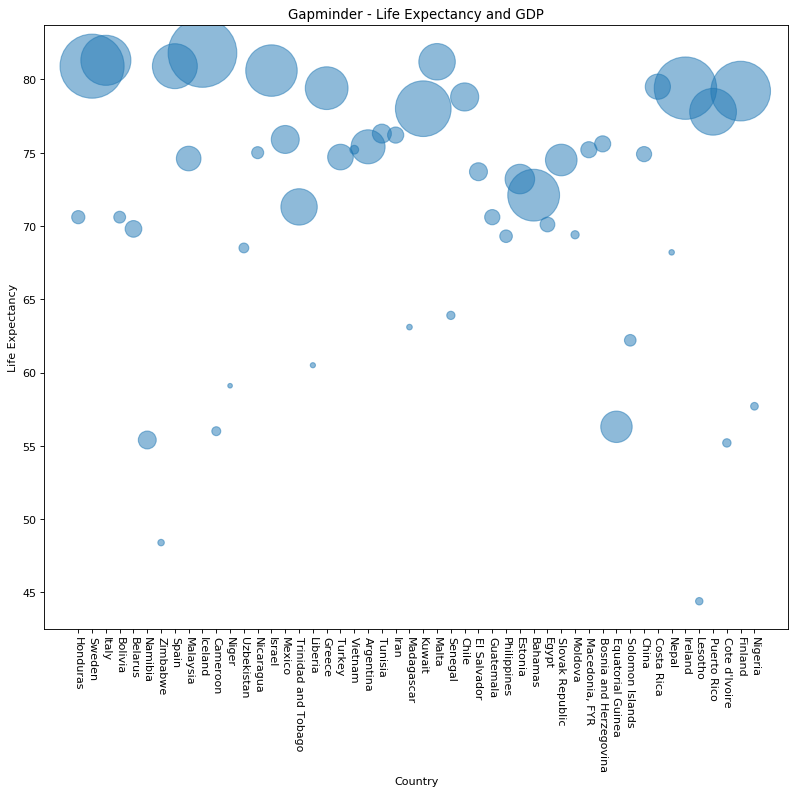

In [20]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y, s=z/10, alpha=0.5)

plt.xticks(rotation=-90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

In [20]:
gm_subset_sorted = gm_subset.sort_values(['gdp'], ascending=True)
gm_subset_sorted

,employment,life_exp,gdp
country,,,
Burundi,83.199997,56.5,133.286878
Eritrea,64.900002,60.0,167.799223
Tajikistan,54.599998,69.2,216.544583
Liberia,66.000000,60.5,217.136528
Nepal,61.799999,68.2,244.537261
Madagascar,83.000000,63.1,255.094152
Haiti,55.900002,61.3,392.094230
Gambia,71.699997,61.9,598.082268
Mauritania,46.900002,63.3,609.934401


In [21]:
x = gm_subset_sorted.index
y = gm_subset_sorted.life_exp
z = gm_subset_sorted.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

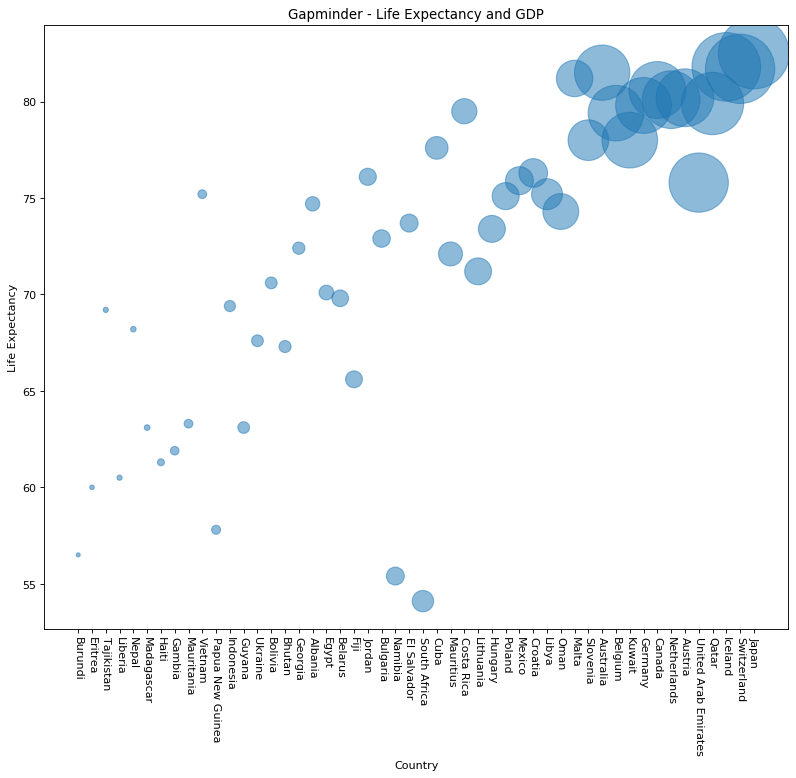

In [23]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x, y, s=z/10, alpha=0.5)

plt.xticks(rotation=-90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

In [24]:
gm_subset_sorted['country'] = gm_subset_sorted.index
gm_subset_sorted.head()

,employment,life_exp,gdp,country
country,,,,
Burundi,83.199997,56.5,133.286878,Burundi
Eritrea,64.900002,60.0,167.799223,Eritrea
Tajikistan,54.599998,69.2,216.544583,Tajikistan
Liberia,66.000000,60.5,217.136528,Liberia
Nepal,61.799999,68.2,244.537261,Nepal


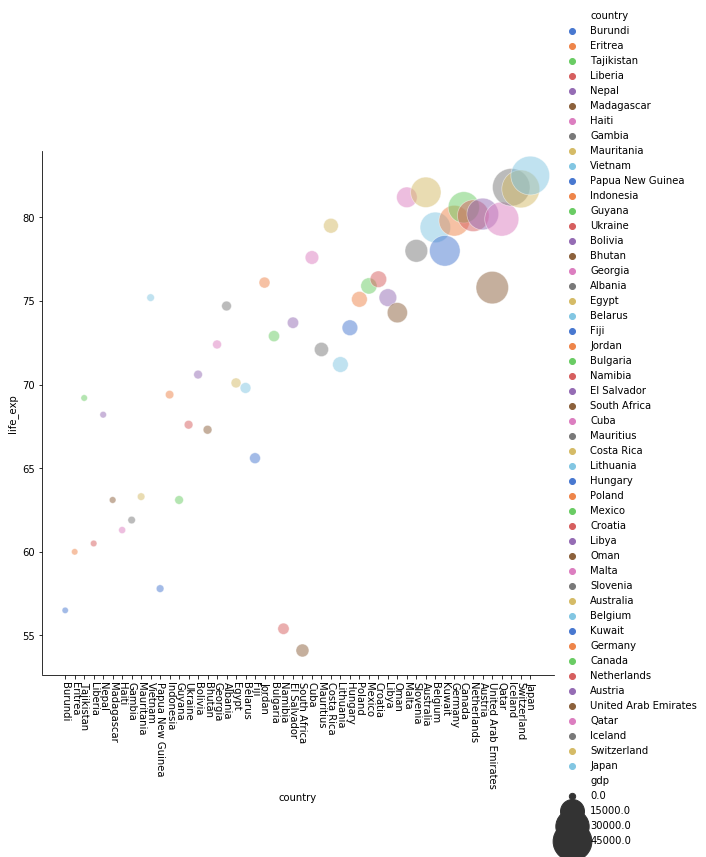

In [27]:
# Plot miles per gallon against horsepower with other semantics
bubble = sb.relplot(x="country", y="life_exp", hue="country", size="gdp", # hue: random하게 color를 assign
            sizes=(40, 1500), alpha=.5, palette="muted",
            # size를 range로 지정; 값의 범위가 너무 큰 경우 log를 씌우면 되는데, 그러면 편차를 알기가 어려움. seaborn에서는 값의 범위를 지정할 수 있음
            height=8, data=gm_subset_sorted)
bubble.set_xticklabels(rotation=-90)